In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [13]:
plt.style.use('seaborn-whitegrid')

## Рассматриваем семейство функций:

$
1 - e^{-a \cdot \big(\frac{t}{b} - c\big)^{m+1}}
$

#### Попробуем манипулировать коэффициентом a

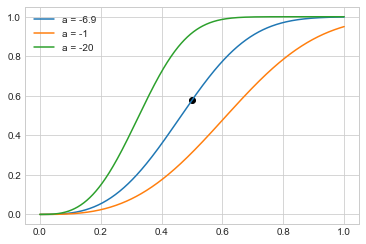

In [82]:
ox = np.linspace(0, 1, 500)
oy = 1 - np.e**(-6.9 * (ox)**(2+1))
oy1 = 1 - np.e**(-3 * (ox)**(2+1))
oy2 = 1 - np.e**(-20 * (ox)**(2+1))

# Хотим, скажем, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - np.e**(-6.9 * (0.5)**(2+1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "a = -6.9")
plt.plot(ox, oy1, label = "a = -1")
plt.plot(ox, oy2, label = "a = -20")

plt.plot()

plt.legend()
plt.show()

Как видим из графиков, коэффициент при экспоненте (-6.9 взят за оригинал, как в 56-й формуле) отвечает за растяжимость функции. Короче становятся все три участка при увеличении а по модулю

#### Попробуем манипулировать коэффициентом m

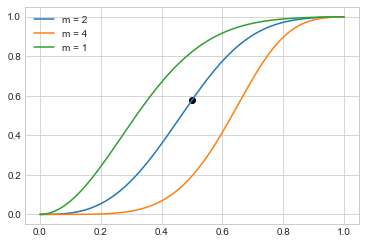

In [76]:
ox = np.linspace(0, 1, 500)
oy = 1 - np.e**(-6.9 * (ox)**(2+1))
oy1 = 1 - np.e**(-6.9 * (ox)**(4+1))
oy2 = 1 - np.e**(-6.9 * (ox)**(2))

# Хотим, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - np.e**(-6.9 * (0.5)**(2+1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "m = 2")
plt.plot(ox, oy1, label = "m = 4")
plt.plot(ox, oy2, label = "m = 1")

plt.plot()

plt.legend()
plt.show()

Коэффициент m отвечает за "выгибаемость". Длина участков такая же, но рост при меньшем m менее явный

Двигать по фазе нехорошо - уедет (0,0). 

## Вывод:

Если мы хотим, чтобы наша функция проходила через 0, через 1, да еще и через зафиксированную точку, нам придется одновременно манипулировать и сжатием (a), и степенью (m). 

#### Предлагаю рассмотреть аналог функции Лапласа: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0

Сссылки нормально пока не научился тут вставлять

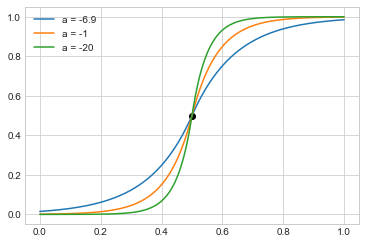

In [124]:
ox = np.linspace(0, 1, 500)

# Laplace
def func(x, alpha, betta):
    return ( (1 + np.sign(x - betta))/2 - np.sign(x - betta)*1./2*np.exp(-np.sign(x - betta)*alpha*2*(x - betta)) )
#    if (x<= betta):
#        return ( 1./2*np.exp(alpha*(x - betta)) )
#    else:
#        return (1 - 1./2*np.exp(-alpha*(x - betta)))

    
oy = func(ox, 3.5, 0.5)#1 - 1./2*np.e**(-0.5 * (ox - 0.5)**(1))
oy1 = func(ox, 6, 0.5)#1 - 1./2*np.e**(-1 * (ox - 0.5)**(1))
oy2 = func(ox, 10, 0.5)#1 - 1./2*np.e**(-7 * (ox - 0.5)**(1))

# Хотим, скажем, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - 1/2*np.e**(-6.9 * (0.)**(1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "a = -6.9")
plt.plot(ox, oy1, label = "a = -1")
plt.plot(ox, oy2, label = "a = -20")

plt.plot()

plt.legend()
plt.show()

График симметричен, фиксируем интересующую нас точку с помощью параметра $\beta$, за крутизну отвечает $\alpha$  и, соответственно, за скорость в зафикисрованной точке

Не знаю, подойдет ли для расчетов такая функция, по условию мне показалось, что от нее может быть толк. Из минусов, следует учитывать, что и в нуле, и в единице, она лишь стремится к заданным значениям (0 и 1) - не достигает их